# Image Analysis Project
## Comparison of image demosaicking techniques

**Author:** Sayeh GHOLIPOUR PICHA (Master 2 SIGMA)

**Date:** February 2022

---



**For this project, I am using a special library of python**

> Note: All the showcased objects support an optional **pattern** argument specifying the arrangement of the colour filters on the pixel array: **'RGGB', 'BGGR', 'GRBG', 'GBRG'**

In [ ]:
!pip install --user colour-demosaicing
!pip install colour

import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [ ]:
!pip install gitpython

In [5]:
import git
git.Git("./").clone("git://github.com/sayeh1994/Comaprison-of-image-demosaicing-techniques.git")
%cd Comaprison-of-image-demosaicing-techniques

/content/Comaprison-of-image-demosaicing-techniques


**Image Demosaicing:**
A demosaicing (also de-mosaicing, demosaicking or debayering) algorithm is a digital image process used to reconstruct a full color image from the incomplete color samples output from an image sensor overlaid with a color filter array (CFA). It is also known as CFA interpolation or color reconstruction [[Wikipedia](https://en.wikipedia.org/wiki/Demosaicing)]. Demosaicing is the interpolation problem of estimating complete color information for an image that has been captured through a CFA, particularly on the Bayer pattern. 

Modern digital camera captures images by using a single image sensor overlaid with a CFA, so one of the image processing pipeline is to demosaicing the images into a viewable format.

**Color filter array:**
A color filter array is a mosaic of color filters in front of the image sensor. The most commonly used CFA configuration is the Bayer filter. This has alternating red (R) and green (G) filters for odd rows and alternating green (G) and blue (B) filters for even rows. There are twice as many green filters as red or blue ones, catering to the human eye's higher sensitivity to green light.
Since each pixel of the sensor is behind a color filter, the output is an array of pixel values, each indicating a raw intensity of one of the three filter colors. Thus, an algorithm is needed to estimate for each pixel the color levels for all color components, rather than a single component.

**Bayer Filter:**
A Bayer filter mosaic is a CFA for arranging RGB color filters on a square grid of photosensors. The filter pattern is half green, one quarter red and one quarter blue array in a quincunx lattice, hence is also called BGGR, RGBG, GRBG or RGGB. The red and blue
pixel locations are spaced uniformly every two pixels. The pattern alternates between "red rows" and "blue rows". In a red row the pattern is R, G, R, G, ... , and in a blue row it is G, B, G, B,... .

> In this project, I first studied some state-of-the-arts and reproduced the results. Then the hands of neural networks in image demosaicing was studied and in the end, a comparison between these techniques is shown.


>> Outline
>>
>> 1.   Mosaicing
2.   Demosaicing - Bilinear
3.   Demosaicing - Malvar, He, and Cutler (2004)
4.   Demosaicing - Menon (2007)
5.   Deep Joint Design of Color Filter Arrays and Demosaicing
6.   Comparion and Discussion



[Colour-demosaicing Library](https://pypi.org/project/colour-demosaicing/)

[Github Directory of the library](https://github.com/colour-science/colour-demosaicing)

In [6]:
import cv2
import matplotlib.pylab as plt
import numpy as np
import math
import os
import colour

from colour_demosaicing import(
    demosaicing_CFA_Bayer_bilinear,
    demosaicing_CFA_Bayer_Malvar2004,
    demosaicing_CFA_Bayer_Menon2007,
    mosaicing_CFA_Bayer)
colour.plotting.colour_style();

# colour.utilities.describe_environment();

/root/.local/lib/python3.7/site-packages/colour/utilities/verbose.py:237: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


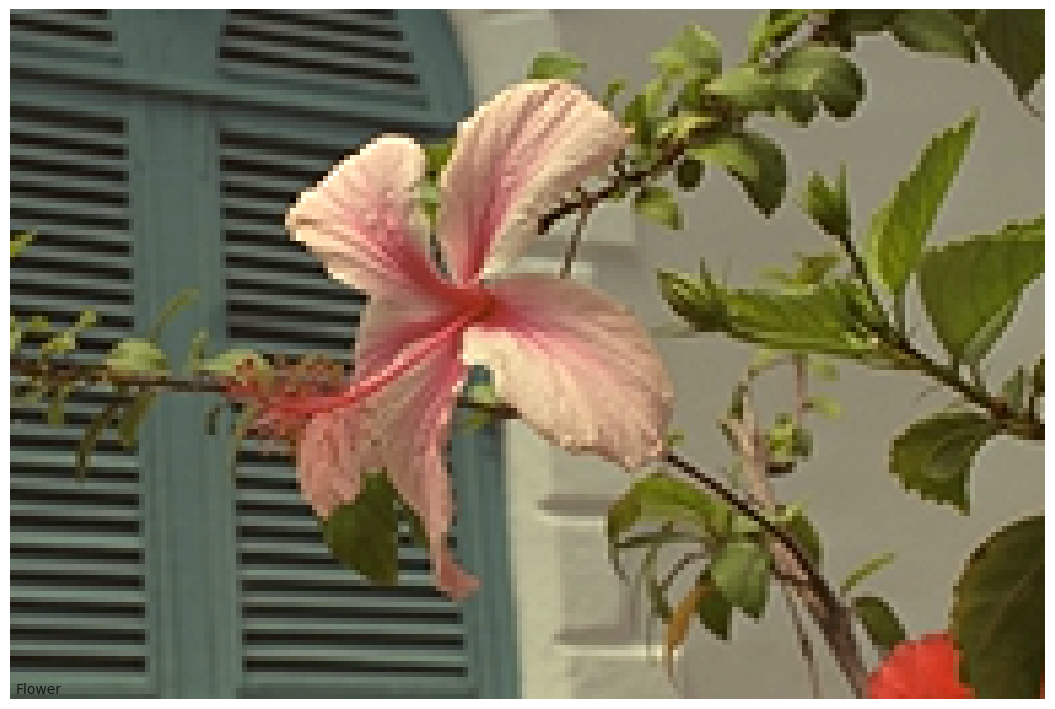

(<Figure size 1280x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe785be8bd0>)

In [8]:
Flower_IMAGE = colour.io.read_image(
    os.path.join('imgs', 'input_02.png'))

colour.plotting.plot_image(
    # colour.cctf_encoding(Flower_IMAGE),
    (Flower_IMAGE),
    text_kwargs={'text': 'Flower', 'color': 'black'}
)

### Mosaicing

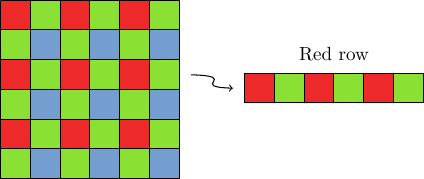  
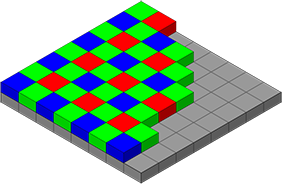

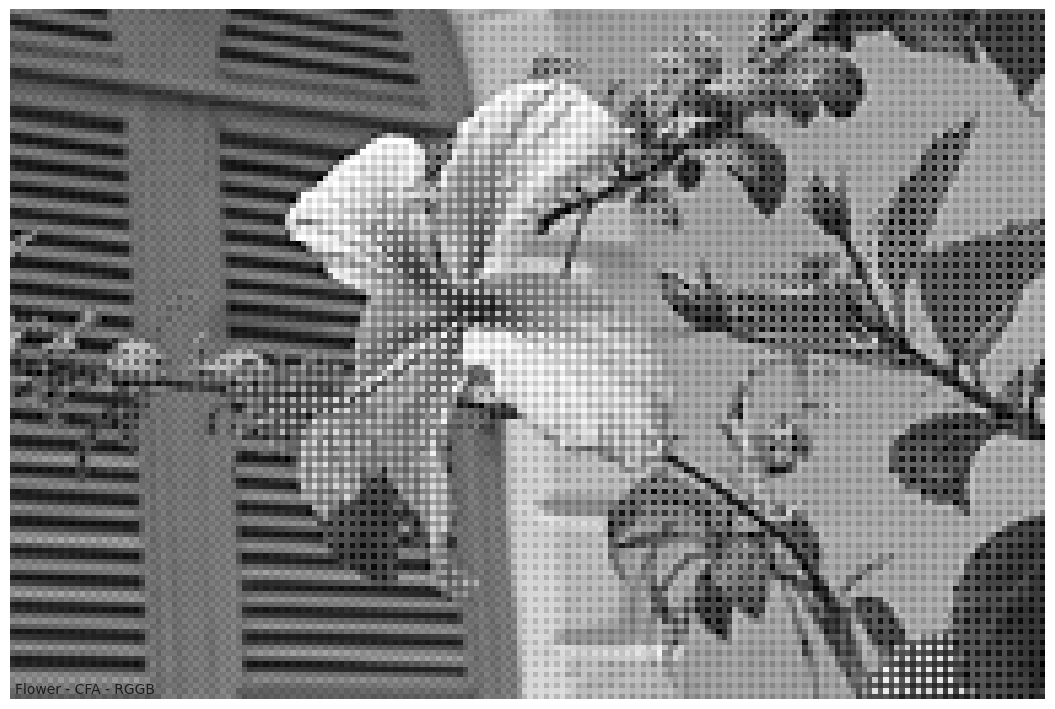

(<Figure size 1280x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0b0dbf6ed0>)

In [ ]:
CFA = mosaicing_CFA_Bayer(Flower_IMAGE)

colour.plotting.plot_image(
    (CFA),
    text_kwargs={'text': 'Flower - CFA - RGGB', 'color': 'black'},
    # imshow_kwargs={'cmap': 'hsv_r'}
    )

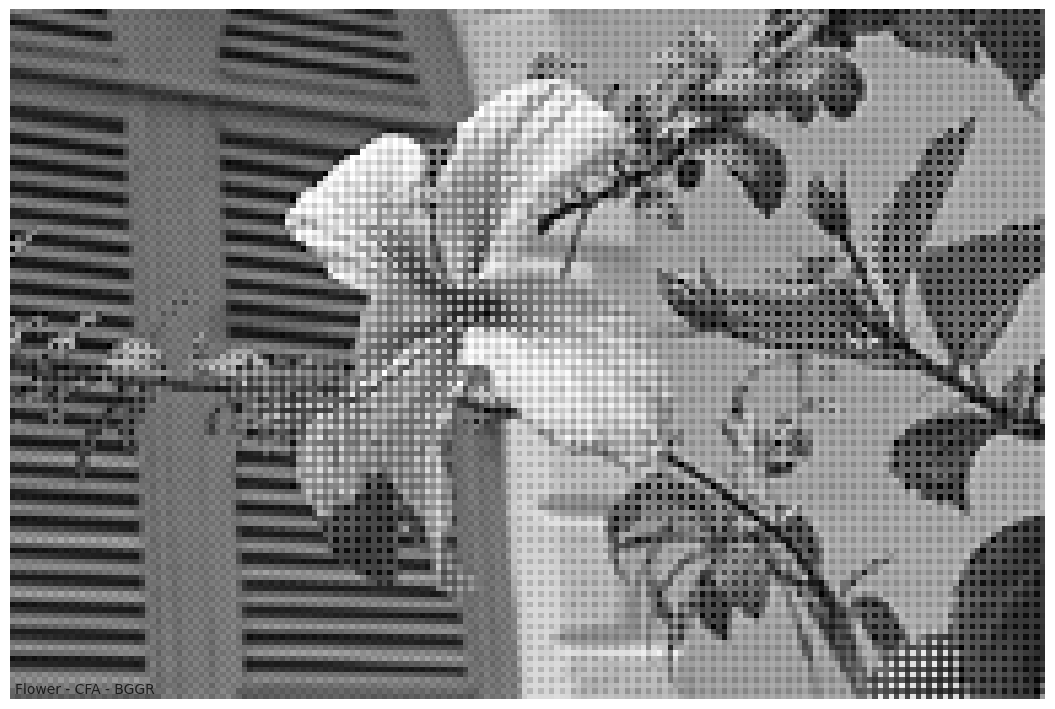

In [ ]:
colour.plotting.plot_image(
    (mosaicing_CFA_Bayer(Flower_IMAGE, 'BGGR')), 
    text_kwargs={'text': 'Flower - CFA - BGGR', 'color': 'black'});

### Demosaicing - Bilinear
Bilinear Interpolation is one of the most basic demosaicing algorithms. Bilinear Interpolation fills the “missing” pixels by using the average of two or four neighbor sensels. The aforementioned algorithms have a lot of artifacts, especially in edges [[1](https://wiki.apertus.org/index.php/OpenCine.Nearest_Neighbor_and_Bilinear_Interpolation)].

The idea behind this method is that since there is a high probability that the value of a missing pixel is similar to the value of adjacent pixels, we can intercept the lost values in each channel by averaging the adjacent pixels. do. In other words, we start with the red channel and for each missing value, we look at the adjacent pixels and if they have a value, we take their average and attribute the calculated average to the missing pixel [[2](https://medium.com/swlh/image-demosaicing-bilinear-interpolation-vs-high-quality-linear-interpolation-5fd2268c4c7a)].

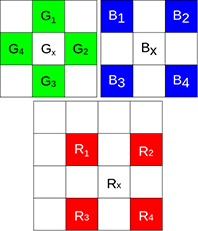

Following equations are used to interpolate the values of Gx, Bx, and Rx:

$G_{x} = \frac{1}{4} (G_1 + G_2 + G_3 + G_4)$

$B_{x} = \frac{1}{4} (B_1 + B_2 + B_3 + B_4)$

$R_{x} = \frac{1}{4} (R_1 + R_2 + R_3 + R_4)$

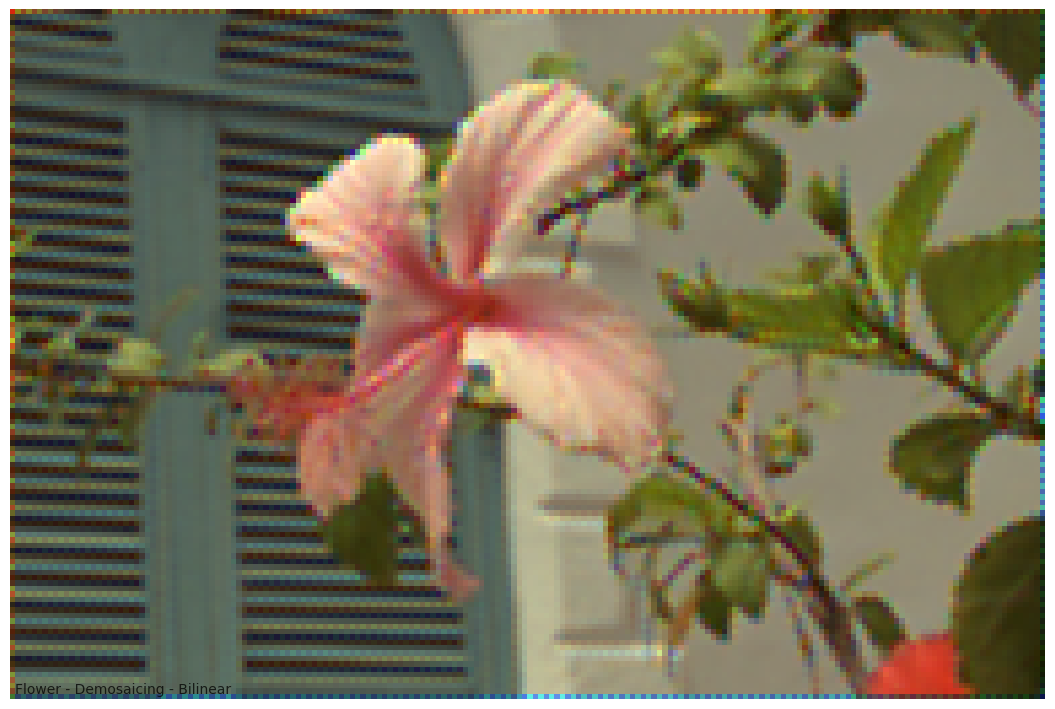

In [ ]:
colour.plotting.plot_image(
    (demosaicing_CFA_Bayer_bilinear(CFA)), 
    text_kwargs={'text': 'Flower - Demosaicing - Bilinear', 'color': 'black'});

### Demosaicing - Malvar, He, and Cutler (2004)

While many complicated methods for demosaicking have been proposed, Malvar, He, and Cutler showed that surprisingly good results are possible with a simple linear method  using 5 × 5 filters [[3](https://www.ipol.im/pub/art/2011/g_mhcd/)].

The method is an improvement of bilinear interpolation.
The visual quality of bilinear demosaicking is generally quite poor. Since the channels are interpolated independently, the misalignments near edges produce strong color distortions and zipper
artifacts.
To improve upon the quality of the bilinear method, Malvar, He, and Cutler follow the work of Pei and Tam [3] by adding Laplacian cross-channel corrections. The green component at a red pixel
location is estimated as

$\hat{G}^{bl}(i,j) = \frac{1}{4}(G(i-1,j) + G(i+1,j) + G(i,j-1) + G(i,j+1))$

$\hat{G}(i,j) = \hat{G}^{bl}(i,j) + αΔ_R(i,j)$

where $Δ_R$ is the discrete 5-point Laplacian of the red channel,

$Δ_R(i,j) ≡ R(i,j) - \frac{1}{4}(R(i-2,j) + R(i+2,j) + R(i,j-2) + R(i,j+2))$

To estimate a red component at a green pixel location,

$\hat{R}(i,j) = \hat{R}^{bl}(i,j) + \beta Δ_G(i,j)$

where $Δ_G$ is a discrete 9-point Laplacian of the green channel.
To estimate a red component at a blue pixel location,

$\hat{R}(i,j) = \hat{R}^{bl}(i,j) + \gamma Δ_B(i,j)$

where $Δ_B$ is the discrete 5-point Laplacian of the blue channel. By symmetry, blue components are estimated in a manner similar to the estimation of the red components.

The parameters $α$, $β$, and $γ$ control the weight of the Laplacian correction terms. The values producing the minimum mean squared error over the Kodak image suite were computed and rounded to dyadic rationals to obtain these paramters as follow:

$α = \frac{1}{2}$, $β = \frac{5}{8}$, $γ = \frac{3}{4}$

The demosaicking is implemented by convolution with a set of linear filters. There are eight different filters for interpolating the different color components at different locations. The filters are
shown in the Figure.

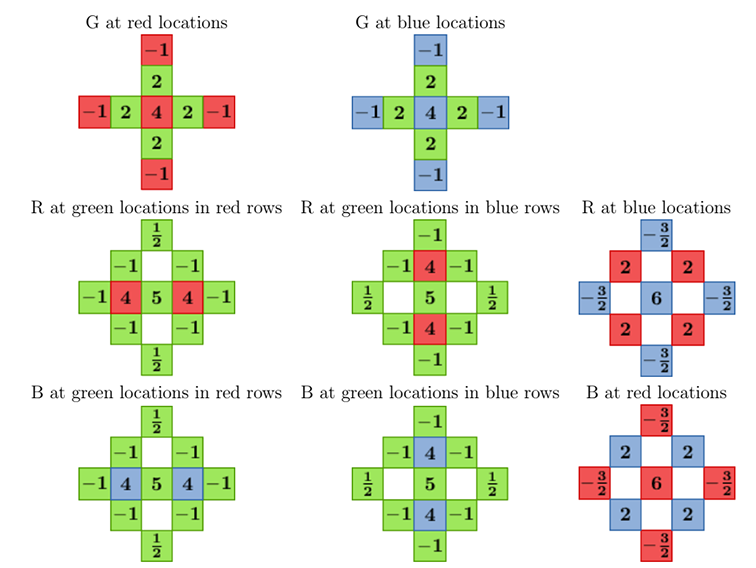

The advantage of this rounding is that the filters may be efficiently implemented with integer arithmetic and bitshifting. The filters approximate the optimal Wiener filters within 5% in terms of
mean squared error for a 5 × 5 support.

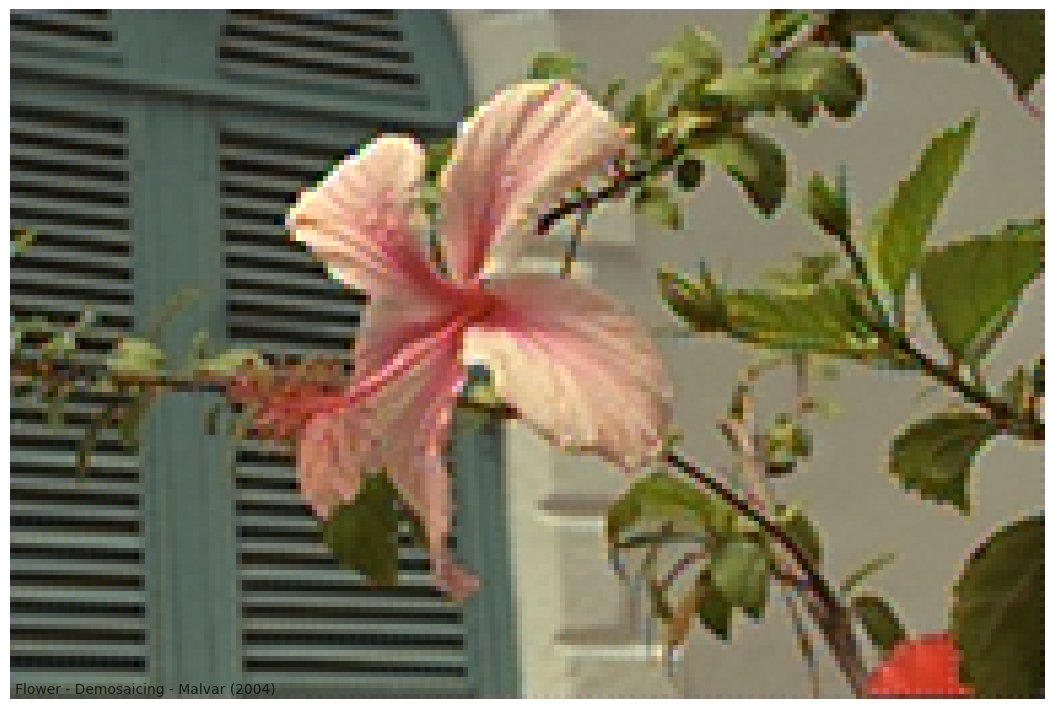

In [ ]:
colour.plotting.plot_image(
    (demosaicing_CFA_Bayer_Malvar2004(CFA)), 
    text_kwargs={'text': 'Flower - Demosaicing - Malvar (2004)', 'color': 'black'});

### Demosaicing - Menon (2007)

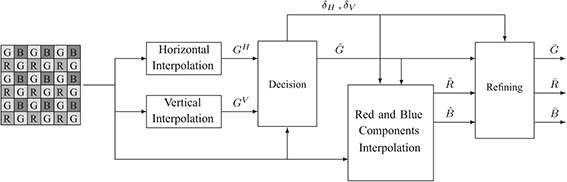

Complete process of the algorithm shown in the figure. The idea in this algorithm happens in three steps.


**1.   Directional Green Interpolation:**
The first step of the algorithm is to reconstruct the green
image along horizontal and vertical directions [[4](https://www.semanticscholar.org/paper/Demosaicing-With-Directional-Filtering-and-a-Menon-Andriani/8c8e4a3cf6d0b8dfdcd36652718ad54afd2fe5fe)]. It does
not use a longer filter because this would produce zipper effect
near the edges. Along a row (or a column) of the Bayer
pattern, the green signal is subsampled with a factor of 2. In the
frequency domain, this gives

$G_s (ω) = \frac{1}{2} G(ω) + \frac{1}{2} G(ω - π)$

where $G(ω)$ and $G_s (ω)$ denote the Fourier transform of the original green signal and of the down-sampled signal, respectively.

**2.   Desicion:**
Once the green component has been interpolated along both
horizontal and vertical directions and two green images have
been produced, a decision has to be made to select the filtering
direction that gives the best performance. A natural property of the images is the smoothness of the color differences. In fact, the color
differences vary slowly and present abrupt changes only across
the edges. Therefore, an image typically has greater values of
the gradients of the color differences across the edges than along
them. This property can be used to locate the presence and the
direction of edges in a natural image and, hence, can be applied
in the decision step to detect which is the most appropriate direction of interpolation.
Note that, due to the structure of the Bayer pattern, the gradients are always computed as a difference of the same kind of
chrominance ($R - G$ or $B - G$). For each red or blue pixel,
The classifiers $δ_H (i,j)$ and $δ_V (i,j)$ then defined as the sum
of the gradients and belonging to a sufficiently large neighborhood of $(i,j)$ (for example, a 5$×$5 window gives good
classifiers). So, considering also the known green samples, a full resolution green image $\hat{G}$ is estimated.

It this way, the two classifiers give an estimate of the local variation of the color differences along the horizontal and vertical directions, and they can be used to estimate the direction of the edges.

**3.   Red and Blue Interpolation:**
After the green channel has been reconstructed, Itt need to interpolate the red and blue components. Besides the Bayer data, now there is a full resolution green image component and the classifiers that can be used for the reconstruction of the other two components. Some particular reconstruction methods based upon the color differences have been explored, but the most used technique remains the bilinear interpolation, sometimes with a small modification for the reconstruction of red (or blue) component in the blue (red) pixels, where an edge-directed interpolation can be applied to interpolate the color differences along one of the two diagonal directions, selected with a laplacian operator.

A notable remark of this algorithm is the study of error in the color channel. For all the approaches, the error is higher in the blue pixels then in the green ones. Similar results are found for the reconstruction of the blue channel. For this reason, in the green locations the bilinear interpolation has applied on the color differences, while a different approach to reconstruct the red
values in the blue pixels and the blue values in the red ones were proposed.
Referring to the estimation of the red component (the same
strategy is applied for the blue one), once all the green positions
are interpolated, these estimated samples were used to reconstruct
red also in the blue pixels. 



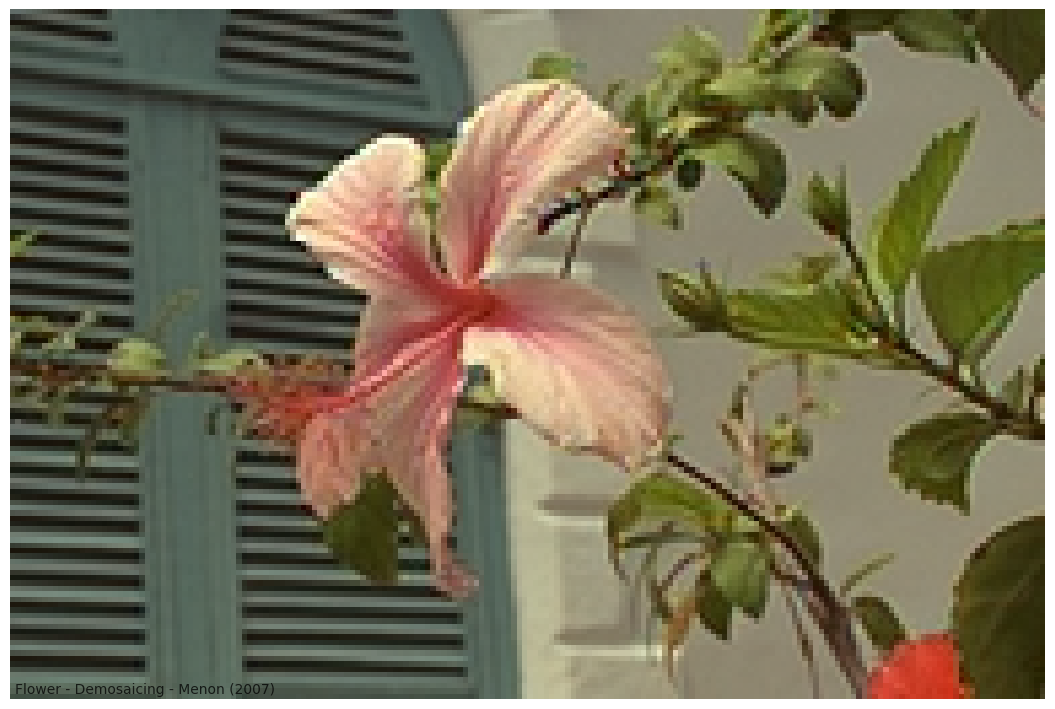

In [ ]:
colour.plotting.plot_image(
    (demosaicing_CFA_Bayer_Menon2007(CFA)), 
    text_kwargs={'text': 'Flower - Demosaicing - Menon (2007)', 'color': 'black'});

>Demosaicing algorithms have been proposed for the frequency domain and are based on hard-coded heuristics for interpolation, self-similarities, optimization schemes, and compressive sensing. Next, demosaicing strategies based on the neural networks will be studying.

### [Deep Joint Design of Color Filter Arrays and Demosaicing](https://github.com/bernardohenz/deep_joint_design_cfa_demosaicing)

This model uses an end-to-end autoecoder that mimics the process of image acquisition. An autoencoder is a learning model that tries to reconstruct the original information after projecting it into a lower-dimensional space. This model's autoencoder jointly obtains a CFA pattern and a demosaicing algorithm. The encoding step projects the
light filtered by the CFA onto a monochromatic sensor, generating a multispectral image mosaic. The decoding step recovers a color image from the mosaic. By training encoder and decoder simultaneously, for any given CFA dimensions our approach automatically finds the CFA pattern and corresponding demosaicing algorithm that minimizes color-reconstruction error [[5](https://www.semanticscholar.org/paper/Deep-Joint-Design-of-Color-Filter-Arrays-and-Henz-Gastal/17b584e531edf57f5b7cfb635d3cd64c3e41024a)]. 

The training process minimizes a loss function defined as the
mean squared error (MSE) between the provided ground truth
and the reconstructed color images. The trainable parameters
are the colors of the CFA pattern (encoder) and the CNN weights
for demosaicing (decoder).

Introduced in the CNN literature as a data-driven compression
method, the autoencoder concept has already been used for image denoising, data visualization, superresolution, and to learn priors used for image reconstruction.

In [ ]:
# Three model can be choose between "bayer", "our_4x4_noise", and "our_4x4_noise-free"
!python reconstruct_image.py --img_name imgs/input_02.png --model our_4x4_noise --output_name out_flower.png

2022-02-04 19:24:59.443733: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Loaded model:  4x4_noise
Starting prediction on img:  imgs/input_02.png
imgs/input_02.png - psnr: 37.22 time : 1.54 seg
reconstruct_image.py:167: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  strdata = bytedata.tostring()


/root/.local/lib/python3.7/site-packages/colour/utilities/verbose.py:237: ColourUsageWarning: "OpenImageIO" related API features are not available, switching to "Imageio"!
  warn(*args, **kwargs)


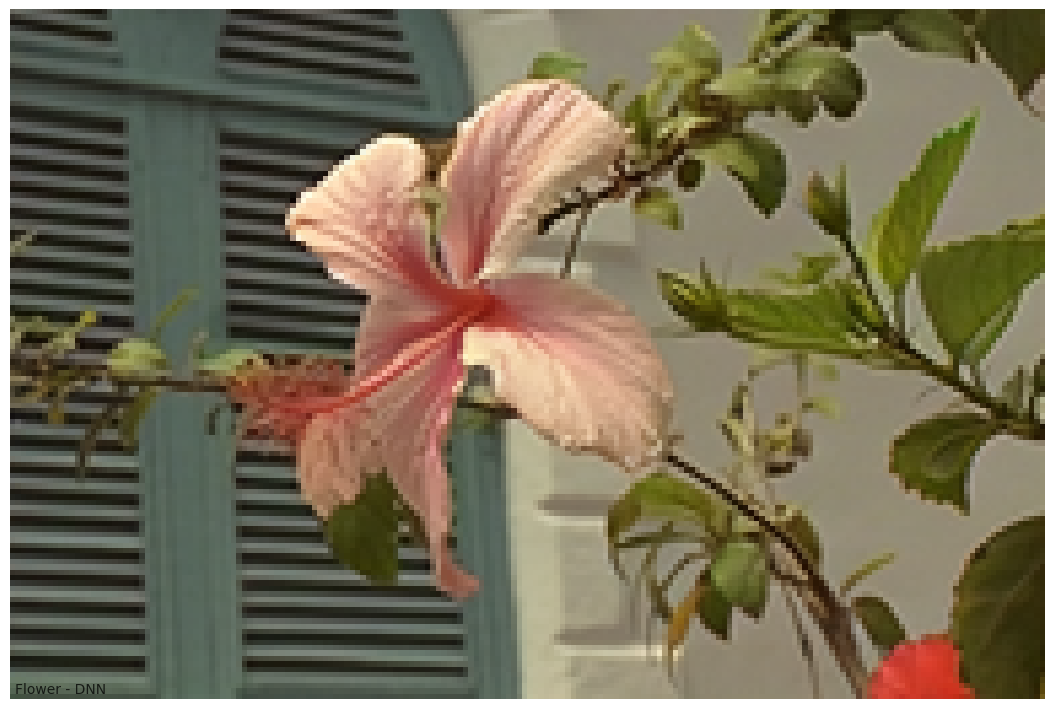

(<Figure size 1280x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f0b0c54ebd0>)

In [ ]:
img = colour.io.read_image(
    os.path.join('out_flower.png'))

colour.plotting.plot_image(
    img,
    text_kwargs={'text': 'Flower - DNN', 'color': 'black'}
)

### Comparison and Discussion

By introducing a benchmark for comparing these techniques, I use the signal-to-noise ratio (PSNR).

By comparing the PSNR, the neural network outperformed the state-of-the-art by all standards.This technique produces high-quality color reconstructions. However, Menon (2007) demosaicing performed very well, both in terms of criteria and visual comparison.

Conversely, although Malvar, He, and Cutler (2004) performed better than the bilinear method, they failed to achieve the performance of other techniques. Nevertheless, Malvar, He, and Cutler (2004) work very well for a simple linear method. This method reduced color distortion and zipper artifacts near the edges. Compared to computational cost, Malvar, He, and Cutler (2004) performed better than others with fair results.

In the end, in my personal opinion, it is better to rely on the neural network, because by the standards, it produces better results for images with or without noise.

In [ ]:
def psnr(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 10 * math.log10(1. / mse)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'DNN - PSNR = 37.218')

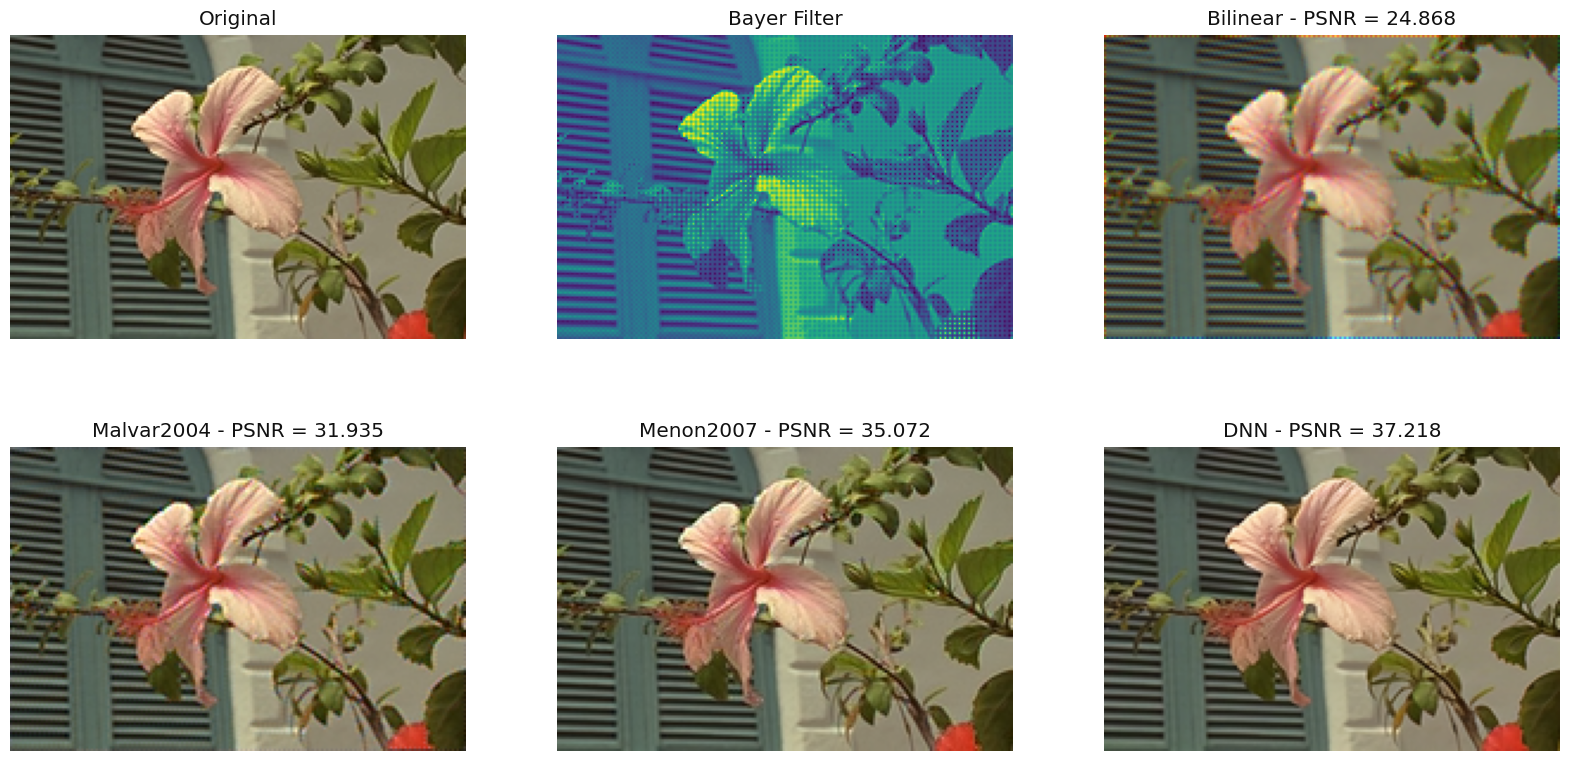

In [ ]:
fig, ([ax1, ax2, ax3], [ax4,ax5,ax6]) = plt.subplots(2,3, figsize=(20,10))
ax1.imshow(Flower_IMAGE)
ax1.grid(False)
ax1.axis("off")
ax1.set_title("Original")

ax2.imshow(mosaicing_CFA_Bayer(Flower_IMAGE, 'BGGR'))
ax2.grid(False)
ax2.axis("off")
ax2.set_title("Bayer Filter")

ax3.imshow(demosaicing_CFA_Bayer_bilinear(CFA))
ax3.grid(False)
ax3.axis("off")
ax3.set_title("Bilinear - PSNR = {:.3f}".format(psnr(Flower_IMAGE, demosaicing_CFA_Bayer_bilinear(CFA))))

ax4.imshow(demosaicing_CFA_Bayer_Malvar2004(CFA))
ax4.grid(False)
ax4.axis("off")
ax4.set_title("Malvar2004 - PSNR = {:.3f}".format(psnr(Flower_IMAGE, demosaicing_CFA_Bayer_Malvar2004(CFA))))

ax5.imshow(demosaicing_CFA_Bayer_Menon2007(CFA))
ax5.grid(False)
ax5.axis("off")
ax5.set_title("Menon2007 - PSNR = {:.3f}".format(psnr(Flower_IMAGE, demosaicing_CFA_Bayer_Menon2007(CFA))))

ax6.imshow(img)
ax6.grid(False)
ax6.axis("off")
ax6.set_title("DNN - PSNR = {:.3f}".format(psnr(Flower_IMAGE, img)))

## References



1.   https://wiki.apertus.org/index.php/OpenCine.Nearest_Neighbor_and_Bilinear_Interpolation
2.   Ali Pourramezan Fard, Image Demosaicing: Bilinear Interpolation VS High-Quality Linear Interpolation, Oct (2020).
3.   Pascal Getreuer, Malvar-He-Cutler Linear Image Demosaicking, Image Processing On Line, 1 (2011), pp. 83–89. https://doi.org/10.5201/ipol.2011.g_mhcd
4.   Menon, D., Andriani, S., & Calvagno, G. (2007). Demosaicing With Directional Filtering and a posteriori Decision. IEEE Transactions on Image Processing, 16, 132-141.
5.   Henz, B., Gastal, E.S., & Neto, M.M. (2018). Deep Joint Design of Color Filter Arrays and Demosaicing. Computer Graphics Forum, 37.

